In [1]:
import numpy as np
#import mlflow
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
from PIL import Image
from dataset import *
from save_load import *
from NN_library.AutoUnet.AutoUnet_new import *
from NN_library.AutoUnet_2.train_AutoUnet_2 import *
%load_ext autoreload
%autoreload 2

#mlflow.autolog()

Using device: cuda


In [2]:
data = dataset_new()
loaders = get_loaders(data, 8)

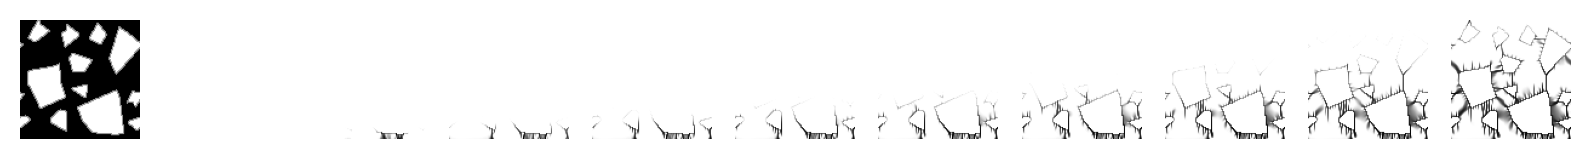

In [3]:
geometry, damage, imp_shrinkage, obs_shrinkage, stiffness = data.__getitem__(14000)
fig, axs = plt.subplots(nrows=1, ncols=11, figsize=(10, 1), dpi=200)
axs.flat[0].imshow(geometry[0], cmap='Greys')
axs.flat[0].set_axis_off()
for i in range(1,11):
    axs.flat[i].imshow(damage[i], cmap='Greys')
    axs.flat[i].set_axis_off()

In [21]:
torch.min(imp_shrinkage[-1])

tensor(-0.0010)

In [18]:
imp_shrinkage[1:,-1,0]-imp_shrinkage[:-1,-1,0]

tensor([-8.7505e-05, -9.7786e-05, -9.8267e-05, -9.8498e-05, -9.8597e-05,
        -9.8606e-05, -9.9898e-05, -1.0047e-04, -1.0036e-04, -1.0266e-04])

In [19]:
imp_shrinkage[1:,1,0]-imp_shrinkage[:-1,1,0]

tensor([-3.3599e-09, -4.7059e-07, -8.7300e-07, -5.1393e-06, -7.4228e-06,
        -7.6243e-06, -2.2705e-05, -2.9364e-05, -5.5494e-05, -1.2834e-04])

In [4]:
name = 'NN_library/AutoUnet_2/AutoUnet_2_new'
args = {'lr' : 0.000001, 'epochs' : 20, 'dev' : dev, 'name' : name}

In [5]:
unet = AutoUNet()

In [6]:
torch.cuda.empty_cache() 

In [7]:
total_params = sum(p.numel() for p in unet.parameters())
print(f"Number of parameters: {total_params}")

Number of parameters: 7697345


In [8]:
unet = load_network(unet, 'NN_library/AutoUnet/AutoUnet', args)

In [17]:
unet = load_network(unet, name + '_19', args)

In [20]:
losses_train, losses_val = train(unet, loaders, args) 

Epoch: 0 batch: 0 mean train loss:  963.2517628219
Epoch: 0 batch: 200 mean train loss:  1144.0140183126
Epoch: 0 batch: 400 mean train loss:  840.3698802267
Epoch: 0 batch: 600 mean train loss:  1032.3267016867
Epoch: 0 batch: 800 mean train loss:  931.7586647816
Epoch: 0 batch: 1000 mean train loss:  698.1256696843
Epoch: 0 batch: 1200 mean train loss:  1079.7103652013
Epoch: 0 batch: 1400 mean train loss:  993.7023759894
Epoch: 0 mean train loss:  874.9153448346 mean val. rec. loss:  647.4051513672
Epoch: 1 batch: 0 mean train loss:  799.7514729872
Epoch: 1 batch: 200 mean train loss:  854.2402407192
Epoch: 1 batch: 400 mean train loss:  715.3423410719
Epoch: 1 batch: 600 mean train loss:  937.2257155105
Epoch: 1 batch: 800 mean train loss:  704.5808348209
Epoch: 1 batch: 1000 mean train loss:  847.4062252492
Epoch: 1 batch: 1200 mean train loss:  674.7641082630
Epoch: 1 batch: 1400 mean train loss:  552.0291602907
Epoch: 1 mean train loss:  875.6046776714 mean val. rec. loss:  638.

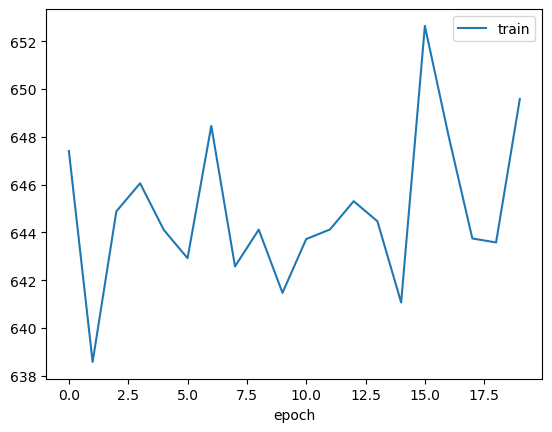

In [24]:
#plt.plot(losses_train)
plt.plot(losses_val)
plt.xlabel('epoch') 
plt.legend(['train', 'validation']) 